### TP : Traitement du Signal
## Objectif

L'objectif de ce TP est de mesurer la vitesse du son en utilisant le matériel fourni.

## Matériel

- Haut-parleur
- Deux microphones
- Ordinateur avec Python et Jupyter Notebook installés

## Questions

1. Comment peut-on mesurer la vitesse du son ?
2. Comment isoler le signal émis par l'haut-parleur et comment peut-on minimiser les bruits captés par les microphones ?
3. Utiliser les différents signaux afin de déduire lequel est le plus qualitatif.

## Code

Voici le code Python à utiliser pour générer les signaux et enregistrer le son :

```
# Importer les bibliothèques nécessaires
# Gestion du son
import sounddevice as sd
import soundfile as sf
# Bibliothèques pour analyse traitement du signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import numpy as np
#Bibliothèques pour générer, acquérir les sons
import traitsignfip


data_left, data_right = traitsignfip.play_and_record("whitenoise",2) 
#Acquisition du son des microphones durant 5 secondes, l'haut-parleur émet le son passé en argument pendant X seconde (Ici 2 secondes)
#Renvoie 2 tableaux (Left and Right) car chacun des 2 micros enregistre sur un canal différent. 
#Ainsi deux tableaux permettent de traiter les valeurs de chaque micro.
```


# Code python permettant de réaliser la mesure du son

Temps PIC Gauche : 2.005918367346939
Temps PIC Droit : 2.007324263038549
Delta : 0.0014058956916098708
Vitesse : 355.6451612903495 m/s


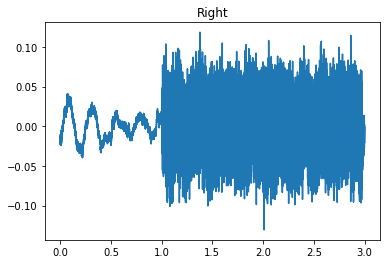

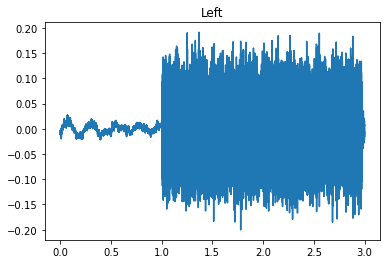

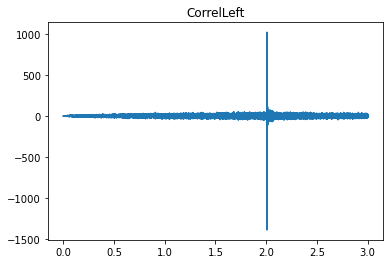

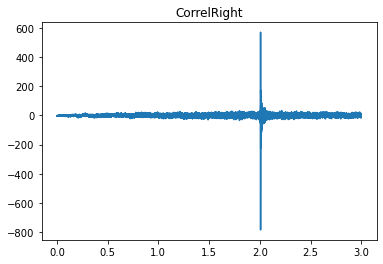

In [18]:
# Importer les bibliothèques nécessaires
# Gestion du son
import sounddevice as sd
import soundfile as sf
# Bibliothèques pour analyse traitement du signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
#Bibliothèques pour générer, acquérir les sons
import traitsignfip
from importlib import reload
reload(traitsignfip)

traitsignfip.init_volume()


data_left, data_right,samples = traitsignfip.play_and_record("whitenoise",2)

fs = 44100 # fréquence d'échantillonage
N=len(data_left) #nombre d'échantillions 
n = np.arange(0,N)/fs   #on divise par la fréquence d'échantillonage pour etre mieux dans l'échelle 

distance=0.50#Distance entre les deux micros en mètre

#affichage du channel 1 
plt.figure()
plt.title("Right")
plt.plot(n,data_right)
plt.figure()
plt.title("Left")
plt.plot(n,data_left)

corrLeft=scipy.signal.correlate(data_left,samples, mode='same')
corrRight=scipy.signal.correlate(data_right,samples, mode='same')
# Calcul de la corrélation croisée entre les deux signaux

plt.figure()
plt.title("CorrelLeft")
plt.plot(n,corrLeft)
#Intercorrélation gauche 
plt.figure()
plt.title("CorrelRight")
plt.plot(n,corrRight)
#Intercorrélation droite 

# Trouver l'indice du maximum de la corrélation
max_index_Left = np.argmax(corrLeft)/fs
max_index_Right = np.argmax(corrRight)/fs

delta_t = np.abs(max_index_Left - max_index_Right)

print("Temps PIC Gauche : "+str(max_index_Left))
print("Temps PIC Droit : "+str(max_index_Right))

print("Delta : "+str(delta_t))
print("Vitesse : "+str(distance/delta_t)+" m/s")


In [7]:
print("Temps PIC Droit : "+str(max_index_Left))
print("Temps PIC Gauche : "+str(max_index_Right))

print("Delta : "+str(delta_t))
print("Vitesse : "+str(distance/delta_t)+" m/s")

Temps PIC Droit : 2.0084353741496597
Temps PIC Gauche : 2.009886621315193
Delta : 0.0014512471655332426
Vitesse : 344.5312499999139 m/s


# Sans haut-parleur : Utiliser un clap de main et faire la corrélation entre les deux signaux et récupérer la valeur max

Delta t : -0.001746031746031746
Vitesse : -286.3636363636364 m/s


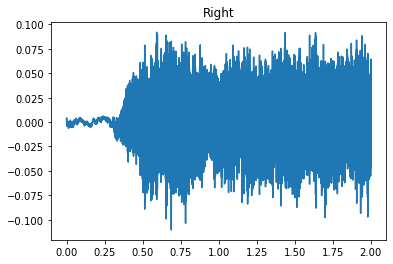

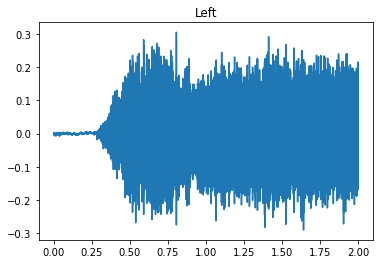

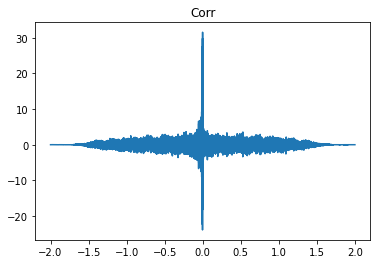

In [272]:
# Importer les bibliothèques nécessaires
# Gestion du son
import sounddevice as sd
import soundfile as sf
# Bibliothèques pour analyse traitement du signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import scipy.signal
import numpy as np
#Bibliothèques pour générer, acquérir les sons
import traitsignfip
from importlib import reload
reload(traitsignfip)



data_left, data_right = traitsignfip.record(2)

fs = 44100 # fréquence d'échantillonage
N=len(data_left) #nombre d'échantillions 
n = np.arange(0,N)/fs   #on divise par la fréquence d'échantillonage pour etre mieux dans l'échelle 

distance=0.5#Distance entre les deux micros en mètre


plt.figure()
plt.title("Right")
plt.plot(n,data_right)
plt.figure()
plt.title("Left")
plt.plot(n,data_left)

corr = scipy.signal.correlate(data_left,data_right,mode="full")

mid = len(corr)//2
abcisse=np.arange(-len(data_left)+1,len(data_left))/44100

plt.figure()
plt.title("Corr")
plt.plot(abcisse,corr)


delta_t = (np.argmax(corr)-mid)/44100

print("Delta t : "+str(delta_t))
print("Vitesse : "+str(distance/delta_t)+" m/s")



In [273]:
reload(traitsignfip)
traitsignfip.init_volume()
print(sd.query_devices())

   0 HDA Intel PCH: ALC3234 Alt Analog (hw:0,2), ALSA (2 in, 0 out)
   1 HDA Intel PCH: HDMI 0 (hw:0,3), ALSA (0 in, 8 out)
   2 HDA Intel PCH: HDMI 1 (hw:0,7), ALSA (0 in, 8 out)
   3 HDA Intel PCH: HDMI 2 (hw:0,8), ALSA (0 in, 8 out)
   4 HDA Intel PCH: HDMI 3 (hw:0,9), ALSA (0 in, 8 out)
   5 HDA Intel PCH: HDMI 4 (hw:0,10), ALSA (0 in, 8 out)
   6 HDA NVidia: HDMI 0 (hw:1,3), ALSA (0 in, 8 out)
   7 HDA NVidia: HDMI 1 (hw:1,7), ALSA (0 in, 8 out)
   8 HDA NVidia: HDMI 2 (hw:1,8), ALSA (0 in, 8 out)
   9 HDA NVidia: HDMI 3 (hw:1,9), ALSA (0 in, 8 out)
  10 HDA NVidia: HDMI 4 (hw:1,10), ALSA (0 in, 8 out)
  11 HDA NVidia: HDMI 5 (hw:1,11), ALSA (0 in, 8 out)
  12 hdmi, ALSA (0 in, 8 out)
  13 pulse, ALSA (32 in, 32 out)
* 14 default, ALSA (32 in, 32 out)
